In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

import matplotlib.pyplot as plt

RANDOM_STATE = 987

In [2]:
data = load_breast_cancer()
print(type(data))

<class 'sklearn.utils.Bunch'>


In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target, name='malignant_or_benign')
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=RANDOM_STATE)
N, D= Xtrain.shape

In [5]:
scaler = StandardScaler()
Xtrainstd = scaler.fit_transform(Xtrain)
Xteststd = scaler.transform(Xtest)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fit_info = model.fit(x=Xtrainstd, y=Ytrain, validation_data=(Xteststd, Ytest), epochs=100)

score_train = model.evaluate(Xtrainstd, Ytrain);
score_test = model.evaluate(Xteststd, Ytest);
print('Train accuracy:', score_train)
print('Test accuracy:', score_test)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 11.4860 - accuracy: 0.1181 - val_loss: 11.1416 - val_accuracy: 0.1596
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 11.0326 - accuracy: 0.1391 - val_loss: 10.5401 - val_accuracy: 0.1915
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 10.5858 - accuracy: 0.1601 - val_loss: 10.2595 - val_accuracy: 0.2074
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 10.4499 - accuracy: 0.1706 - val_loss: 10.0801 - val_accuracy: 0.2128
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 9.9938 - accuracy: 0.1864 - val_loss: 9.6780 - val_accuracy: 0.2181
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 9.6060 - accuracy: 0.2126 - val_loss: 9.4839 - val_accuracy: 0.2234
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 9.1851 - accuracy: 0.2310 - val_loss: 8.9668 - val_accuracy: 0.2447
Epoc

In [7]:
fit_info.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

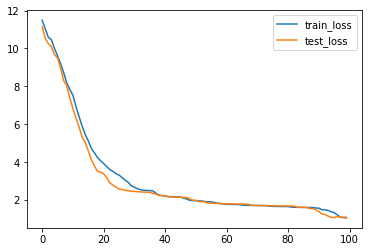

In [8]:
plt.plot(fit_info.history['loss'], label='train_loss');
plt.plot(fit_info.history['val_loss'], label='test_loss');
plt.legend();

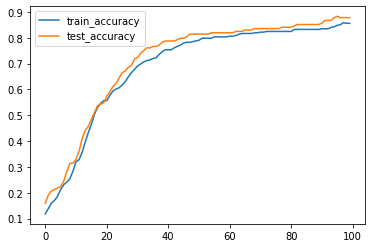

In [9]:
plt.plot(fit_info.history['accuracy'], label='train_accuracy');
plt.plot(fit_info.history['val_accuracy'], label='test_accuracy');
plt.legend();